In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
TerrorDTframe=pd.read_csv('C:\\Users\\supratik chanda\\Documents\\All Docs\\FinalisedTerrorDataFrame.csv')

In [153]:
TerrorDTframe.head()

,Date,Dead,Injured,Perpetrators,Type,Description,Location
0,1,0.0,2.0,Islamic State,Bombing,i soldiers were wounded when an explosive devi...,Iraq
1,1,0.0,0.0,Boko Haram,Arson,Boko Haram militants set on fire several house...,Niger
2,1,5.0,0.0,Boko Haram,Execution,Five people including 3 civilian militia membe...,Niger
3,1,8.0,5.0,Taliban,Shooting,Eight policemen were killed in a Taliban attac...,Afghanistan
4,2,1.0,2.0,Militants,Bombing,A French military doctor was killed and two ot...,Mali


In [154]:
# Finding the dead_counts for Various terror groups

In [155]:
Perpetrators = TerrorDTframe.groupby(['Perpetrators']).agg({'Dead':np.sum})
Perpetrators = Perpetrators.sort_values(by=['Dead'],ascending=False).reset_index(drop=False)
Perpetrators.head()

,Perpetrators,Dead
0,Kataeb Party,4603500.0
1,ISIL,224380.0
2,Islamic State,220839.0
3,CRI,182542.0
4,LTTE,101821.0


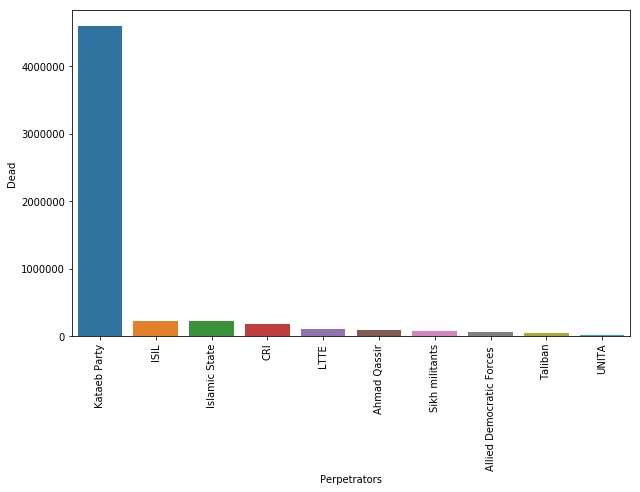

In [156]:
plt.figure(figsize=(10,6))
sns.barplot(x=Perpetrators['Perpetrators'][0:10],y=Perpetrators['Dead'][0:100])
plt.xticks(rotation=90)
plt.show()

In [157]:
#Perpetrators_Pivot = pd.pivot_table(TerrorDTframe,values=['Dead'],index=['Perpetrators'],aggfunc=np.sum)
#Perpetrators_Pivot

In [158]:
# Plotting the type of crime wrt count of the type of crime committed

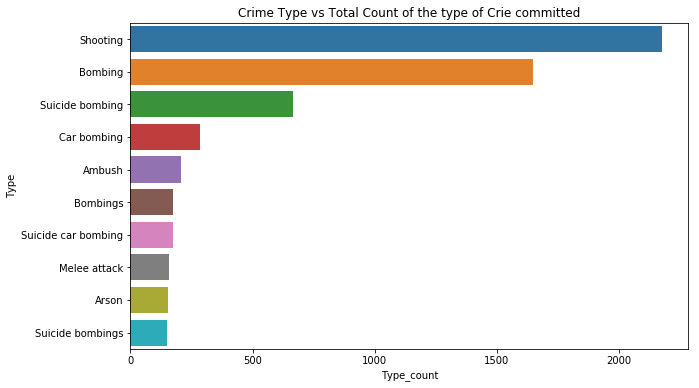

In [159]:
Attack_count = TerrorDTframe.Type.value_counts().to_frame().reset_index(drop=False)\
                                                            .rename(columns={'index':'Type','Type':'Type_count'})
plt.figure(figsize=(10,6))
sns.barplot(y=Attack_count['Type'][0:10],x=Attack_count['Type_count'][0:10])
plt.title('Crime Type vs Total Count of the type of Crie committed')
plt.show()

In [160]:
# Finding out in which location , the dead_count is the most

In [161]:
Dead_Loc = TerrorDTframe.groupby(['Location']).agg({'Dead':np.sum})
Dead_Loc = Dead_Loc.sort_values(by=['Dead'],ascending=False).reset_index(drop=False)
Dead_Loc.head()

,Location,Dead
0,Lebanon,4693521.0
1,Syria,372133.0
2,Russia,184432.0
3,Sri Lanka,105953.0
4,India,84868.0


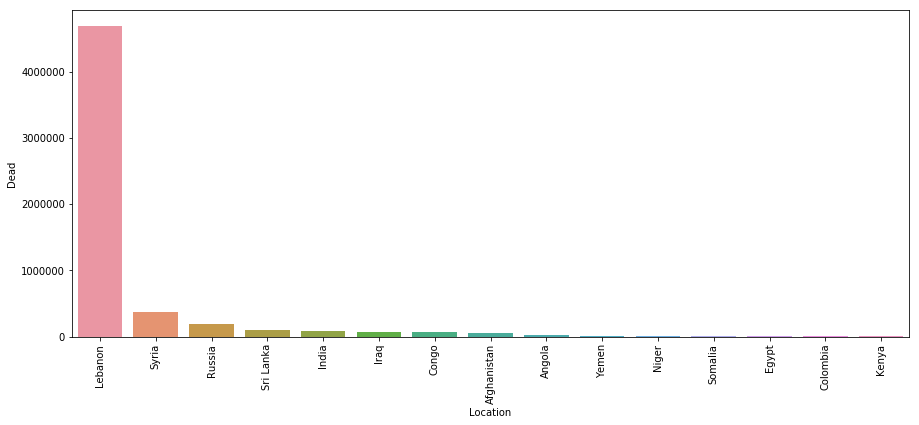

In [162]:
plt.figure(figsize=(15,6))
sns.barplot(x=Dead_Loc['Location'][0:15],y=Dead_Loc['Dead'][0:15])
plt.xticks(rotation=90)
plt.show()

In [163]:
# Removing the stopwords from the Description column of TerrorDTframe

In [164]:
import nltk
from nltk.corpus import stopwords
StopWrds = stopwords.words('english')
from nltk.tokenize import word_tokenize as wt
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 
import re
for each in [',','.']:
    StopWrds.append(each)

In [165]:
filtered_description = pd.Series()
wnl = WordNetLemmatizer()
ps=PorterStemmer()
for each in TerrorDTframe['Description']:
    wrdset= wt(each)
    filtered_sentence_list = [wnl.lemmatize(elem) for elem in wrdset if elem.lower() not in StopWrds ]
    filtered_description = filtered_description.append(pd.Series(' '.join(each for each in filtered_sentence_list)))
filtered_description.reset_index(drop=True,inplace=True)
#filtered_description

In [166]:
TerrorDTframe_Filtered = pd.concat([TerrorDTframe,filtered_description],axis=1)
TerrorDTframe_Filtered = TerrorDTframe_Filtered.drop(columns=['Description']).reset_index(drop=True).rename(columns={0:'Filtered_Description'})
TerrorDTframe_Filtered.head()

,Date,Dead,Injured,Perpetrators,Type,Location,Filtered_Description
0,1,0.0,2.0,Islamic State,Bombing,Iraq,soldier wounded explosive device targeted vehi...
1,1,0.0,0.0,Boko Haram,Arson,Niger,Boko Haram militant set fire several house loo...
2,1,5.0,0.0,Boko Haram,Execution,Niger,Five people including 3 civilian militia membe...
3,1,8.0,5.0,Taliban,Shooting,Afghanistan,Eight policeman killed Taliban attack checkpoi...
4,2,1.0,2.0,Militants,Bombing,Mali,French military doctor killed two others injur...


In [167]:
TerrorDTframe_Filtered = TerrorDTframe_Filtered[['Date','Dead','Injured','Filtered_Description','Type','Location','Perpetrators']]

In [168]:
TerrorDTframe_Filtered.head()

,Date,Dead,Injured,Filtered_Description,Type,Location,Perpetrators
0,1,0.0,2.0,soldier wounded explosive device targeted vehi...,Bombing,Iraq,Islamic State
1,1,0.0,0.0,Boko Haram militant set fire several house loo...,Arson,Niger,Boko Haram
2,1,5.0,0.0,Five people including 3 civilian militia membe...,Execution,Niger,Boko Haram
3,1,8.0,5.0,Eight policeman killed Taliban attack checkpoi...,Shooting,Afghanistan,Taliban
4,2,1.0,2.0,French military doctor killed two others injur...,Bombing,Mali,Militants


In [169]:
## Representating a word cloud 

In [170]:
strCorpus =''
for each in TerrorDTframe_Filtered.Filtered_Description:
    elemList = each.split(' ')
    for elem in elemList:
        if strCorpus == '':
            strCorpus =  elem
        else:
            strCorpus = strCorpus + ' '+ elem
print(strCorpus)

soldier wounded explosive device targeted vehicle Sheikh Tami village located Diyala Boko Haram militant set fire several house looted village area Chibok Five people including 3 civilian militia member executed filmed video Islamic State backed faction Boko Haram Eight policeman killed Taliban attack checkpoint Sholgara District northern Balkh Province Taliban blamed attack French military doctor killed two others injured explosive device detonated vehicle Gourma Region soldier killed number others injured vehicle struck roadside bomb Seiyun district Hadramout province group yet claimed responsibility blamed attack policeman killed 3 others left wounded attack militant Jalawla district Diyala Governorate Shalipora village Kulgam District Abdul Majeed panch shot injured suspected militant died next day hospital victim associated PDP early report also said air support also caused heavy casualty Taliban incident although report said reinforcement arrived area Five policeman killed anothe

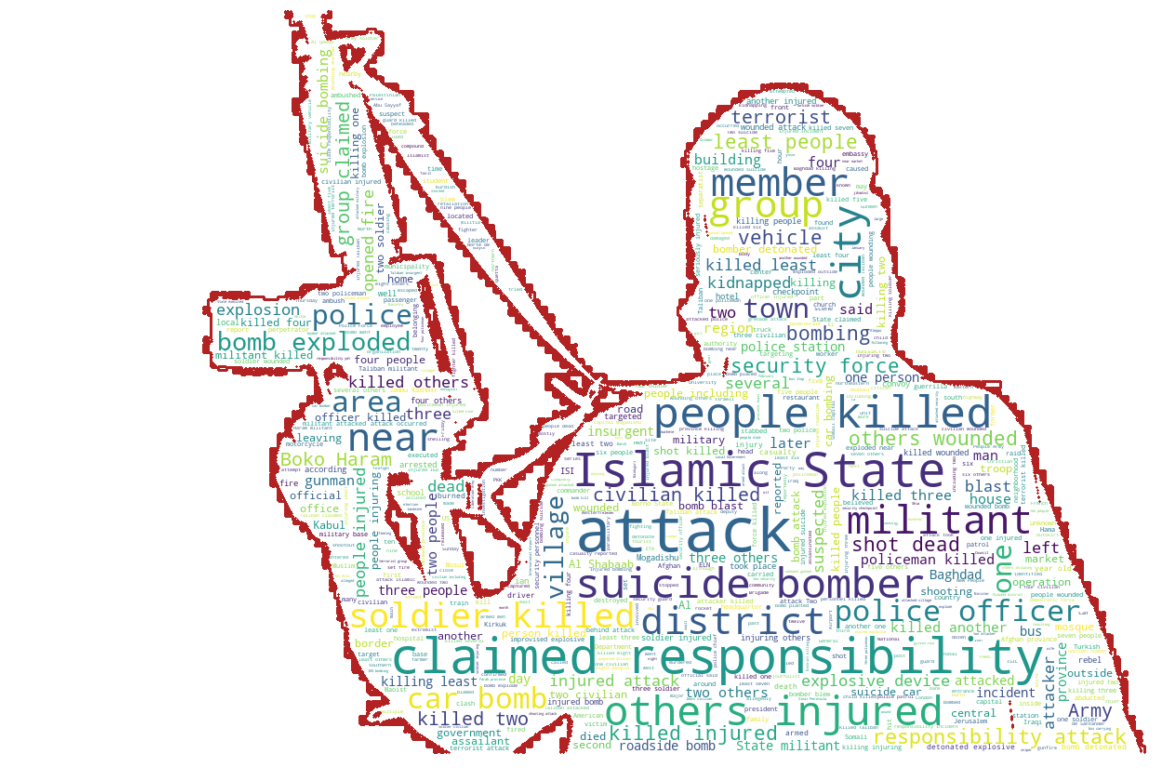

In [171]:
from wordcloud import WordCloud
from PIL import Image
def image_generator(image):
    python_mask = np.array(Image.open(image))
    wcObj = WordCloud(background_color='white',max_words=600,mask=python_mask,contour_color='firebrick',contour_width=3)
    wcObj.generate(strCorpus)
    fig=plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(20)
    plt.imshow(wcObj,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('wordcloud.png')
    #plt.show()
image_generator('Terrorist.jpg')

In [174]:
Loc_Dead_Count = TerrorDTframe_Filtered.groupby('Location').agg({'Dead':np.sum})
Loc_Dead_Count = Loc_Dead_Count.sort_values(by='Dead',ascending=False).reset_index(drop=False)

In [175]:
Loc_Dead_Count.head()

,Location,Dead
0,Lebanon,4693521.0
1,Syria,372133.0
2,Russia,184432.0
3,Sri Lanka,105953.0
4,India,84868.0


In [214]:
import plotly.plotly as py
import pandas as pd
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.columns

Index(['COUNTRY', 'GDP (BILLIONS)', 'CODE'], dtype='object')

In [216]:
Loc_Dead_Count.rename(columns={'Location':'COUNTRY'},inplace=True)
Loc_Dead_Count.head()

,COUNTRY,Dead
0,Lebanon,4693521.0
1,Syria,372133.0
2,Russia,184432.0
3,Sri Lanka,105953.0
4,India,84868.0


In [217]:
tempDT = pd.merge(Loc_Dead_Count,df,how='inner',on='COUNTRY')

In [218]:
tempDT.head()

,COUNTRY,Dead,GDP (BILLIONS),CODE
0,Lebanon,4693521.0,47.50,LBN
1,Syria,372133.0,64.70,SYR
2,Russia,184432.0,2057.00,RUS
3,Sri Lanka,105953.0,71.57,LKA
4,India,84868.0,2048.00,IND


In [228]:
data = [dict(
    type='choropleth',
    locations=tempDT['CODE'],
    z=tempDT['Dead'],
    text=tempDT['COUNTRY'],
    colorscale=[[0, "rgb(5, 10, 172)"], [0.35, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                [0.6, "rgb(90, 120, 245)"], [0.7, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale=True,
    
    colorbar=dict(
        autotick=True,
        title='Dead_Count'),
)]

layout = dict(
    title='Total_Dead_Person_Count_On_Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection=dict(
            type='g'
        )
    )
)

fig = dict(data=data, layout=layout)
plot(fig,validate=False, filename='d3-world-map.html')

'file://C:\\Users\\supratik chanda\\Desktop\\Python Tutorial1\\Data Science Final Project\\d3-world-map.html'

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
vectorizer = tfidf(max_features=1000)
X_description = vectorizer.fit_transform(TerrorDTframe_Filtered.Filtered_Description)
print(vectorizer.get_feature_names()[0:10])
X_description = X_description.toarray()

['10', '100', '11', '12', '13', '14', '15', '16', '17', '18']


In [282]:
dtFrame= pd.DataFrame(X_description)

In [283]:
dtFrame = pd.concat([dtFrame,TerrorDTframe_Filtered.Type,TerrorDTframe_Filtered.Location],axis=1)

In [284]:
print(dtFrame.shape)
dtFrame.head()

(8514, 1002)


,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,Type,Location
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.201293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Iraq
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arson,Niger
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Execution,Niger
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shooting,Afghanistan
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Mali


In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lm = LogisticRegression()
X = pd.get_dummies(data = dtFrame,columns=['Type','Location'])


"X_train,X_test,y_train,y_test = train_test_split(dtFrame,test_size=0.2,random_state=6,stratify= dtFrame['Perpetrator'])\nparam_grid = dict(C:[0.1,0.5,0.8,1],penalty=['l1','l2'],random_state:[0,5,16,27])\ngdSearchCV = GridSearchCV(lm,param_grid,cv=5).fit(dtFrame)"

In [289]:
X= pd.concat([X,TerrorDTframe_Filtered.Perpetrators],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,Location_United Kingdom,Location_United States,Location_Uruguay,Location_Uzbekistan,Location_Venezuela,Location_Vietnam,Location_West Bank,Location_Yemen,Location_Zimbabwe,Perpetrators
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Islamic State
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Boko Haram
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Boko Haram
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Taliban
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Militants


In [297]:
import warnings
warnings.simplefilter('ignore')
train_set,test_set = train_test_split(X,test_size=0.2,random_state=6)
param_grid = dict(C=[0.1,0.5,0.8,1],penalty=['l1','l2'],random_state=[0,5,16,27])
rdSearchCV = RandomizedSearchCV(lm,param_grid,cv=5).fit(train_set.iloc[:,:-1],train_set.iloc[:,-1])
print('For RandomizedSearchCV:')
print('grid best score for train_set: ',rdSearchCV.best_score_)
print('grid best parameters for train_set: ',rdSearchCV.best_params_)

For RandomizedSearchCV:
grid best score for train_set:  0.4837762443106739
grid best parameters for train_set:  {'random_state': 5, 'penalty': 'l1', 'C': 1}
